In [1]:
### import same libraries as preview current scenario
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

###  handlin missing  data
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

### libraries for feature selection 
from scipy.stats import chi2_contingency
from scipy import stats

#### added f_classif here as the target value could be a categorical encoded.. :)
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.feature_selection import SelectKBest

### Researched missingno library
# !pip install missingno
import missingno as msno

## adding category_encoders library
from category_encoders import BinaryEncoder
# pip install category_encoders



In [2]:
### load untreated original dataset
df_ml2=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_Return_Updated_27_03_2024.csv")
# df_ml2.head(15)
# df_ml2.info()
df_ml2.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

<Axes: >

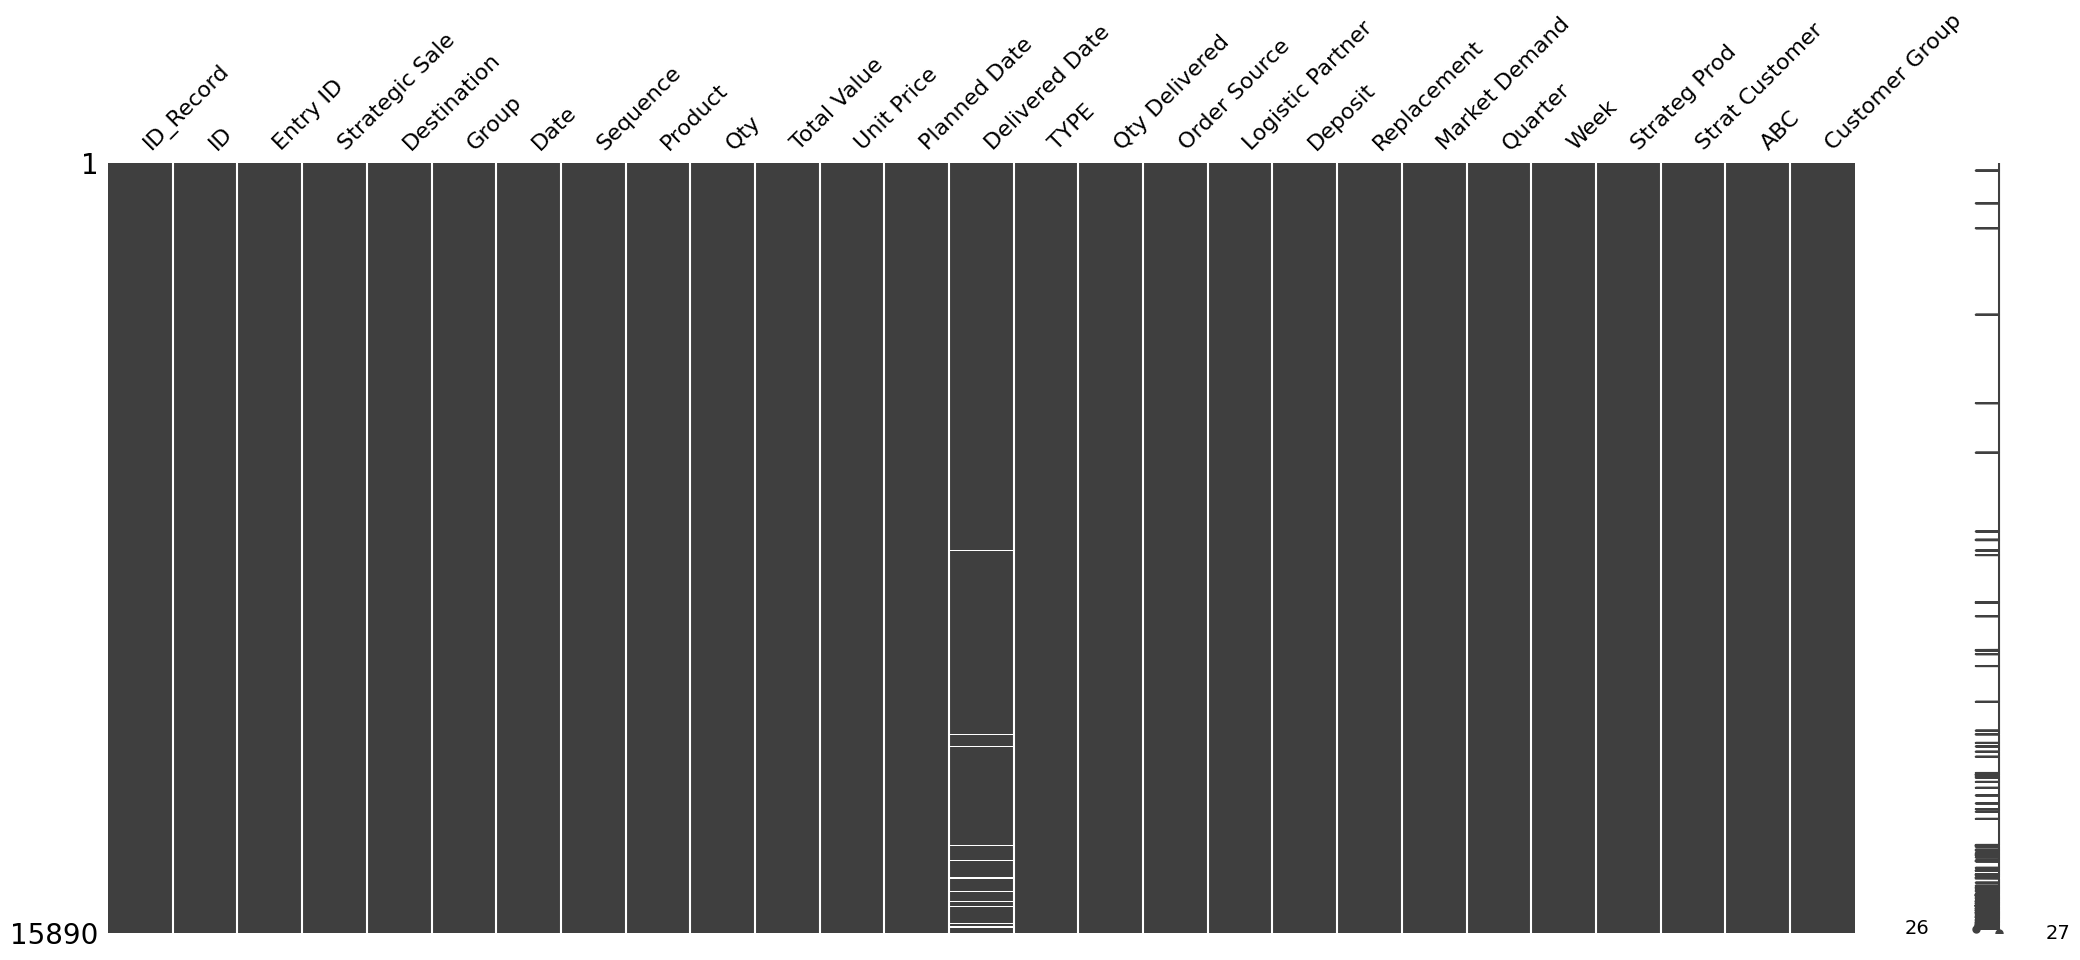

In [3]:
### Research: 
### MCAR (Missing Completely at Random)
### MAR (Missing at Random)
### MNAR (Missing Not at Random)
# For missing values... Missing at Random (MAR), MCAR, MNAR.. see if you find these types on the dataframe

msno.matrix(df_ml2)

### Below visualization validated the missing data are in column "Delivery Date"

In [4]:
### we will execute a number of data treatment
## 1. total price value treatment
### values treatment 

## remove all extra spaces in column name
df_ml2.columns=df_ml2.columns.str.strip()
df_ml2["Total Value"]=df_ml2["Total Value"].str.replace("$", "").str.replace(",", "").astype(float)

#df_ml_tr.head()
df_ml2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Record         15890 non-null  int64  
 1   ID                15890 non-null  int64  
 2   Entry ID          15890 non-null  int64  
 3   Strategic Sale    15890 non-null  int64  
 4   Destination       15890 non-null  object 
 5   Group             15890 non-null  int64  
 6   Date              15890 non-null  object 
 7   Sequence          15890 non-null  int64  
 8   Product           15890 non-null  int64  
 9   Qty               15890 non-null  int64  
 10  Total Value       15890 non-null  float64
 11  Unit Price        15890 non-null  float64
 12  Planned Date      15890 non-null  object 
 13  Delivered Date    15571 non-null  object 
 14  TYPE              15890 non-null  object 
 15  Qty Delivered     15890 non-null  object 
 16  Order Source      15890 non-null  object

In [5]:

### dates columns treatment
df_ml2["Planned Date"]=pd.to_datetime(df_ml2["Planned Date"])
df_ml2["Date"]=pd.to_datetime(df_ml2["Date"])
df_ml2["Delivered Date"]=pd.to_datetime(df_ml2["Delivered Date"])

### convert dates back to strings in specified format
df_ml2["Planned Date_str"]=df_ml2["Planned Date"].dt.strftime("%m/%d/%Y")
df_ml2["Date_str"]=df_ml2["Date"].dt.strftime("%m/%d/%Y")
df_ml2["Delivered Date_str"]=df_ml2["Delivered Date"].dt.strftime("%m/%d/%Y")

### additional feature engineering based on dates
### decompose date columns
df_ml2["Year"]=df_ml2["Date"].dt.year
df_ml2["Month"]=df_ml2["Date"].dt.month
df_ml2["Day"]=df_ml2["Date"].dt.day
## Monday=0, Sunday=6
df_ml2["DayOfWeek"]=df_ml2["Date"].dt.weekday 

### calculate the lead time in days
df_ml2["Days_to_Deliver"]=(df_ml2["Delivered Date"] - df_ml2["Planned Date"]).dt.days

### handling the "Quarter" column, extract year and quarter from the "Quarter" column
df_ml2["Quarter_Year"]=df_ml2["Quarter"].str.slice(0, 4).astype(int)
df_ml2["Quarter_Num"]=df_ml2["Quarter"].str[-1].astype(int)

print(df_ml2.head())

   ID_Record  ID  Entry ID  Strategic Sale Destination  Group       Date  \
0          1  57     17592               1           ?      7 2021-01-23   
1          2  57     17899               1           ?      7 2021-05-01   
2          3  66     18072               0          NL      2 2021-06-26   
3          4  17     18181               1          US      2 2021-08-02   
4          5  55     18335               1          DE      7 2021-09-13   

   Sequence  Product   Qty  ...  Planned Date_str    Date_str  \
0         8     4482   250  ...        02/22/2021  01/23/2021   
1         1     4486  2200  ...        05/03/2021  05/01/2021   
2        77     4440    30  ...        06/26/2021  06/26/2021   
3        11     4440    62  ...        08/02/2021  08/02/2021   
4         2     4481   250  ...        07/16/2023  09/13/2021   

  Delivered Date_str  Year Month Day DayOfWeek Days_to_Deliver Quarter_Year  \
0         02/14/2023  2021     1  23         5           722.0         20

In [6]:
### convert values in "Strat Customer" column
convert_strat_cust = {"YES": 1, "Yes": 1, "No": 0, "NO": 0}
df_ml2["Strat Customer Converted"] = df_ml2["Strat Customer"].replace(convert_strat_cust)

# drop original "Strat Customer" column
df_ml2 = df_ml2.drop(columns=["Strat Customer"])

In [7]:
### convert "TYPE" column and add to the end as a new column
sales_return_type = {"SALE": 8, "RETURN": 4}
df_ml2["TYPE Converted"] = df_ml2["TYPE"].replace(sales_return_type)

# drop the original "TYPE" column
df_ml2 = df_ml2.drop(columns=["TYPE"])

In [8]:
### convert "Replacement" column and add to the end as a new column
replacement_col = {"YES": 1, "Yes": 1, "No": 0, "NO": 0}
df_ml2["Replacement Converted"]=df_ml2["Replacement"].replace(replacement_col)

# drop the original "TYPE" column
df_ml2=df_ml2.drop(columns=["Replacement"])

In [9]:
######### ******************** #########

### ensure "Total Value", "Qty", and "Qty Delivered" columns are numeric values
df_ml2["Total Value"]=pd.to_numeric(df_ml2["Total Value"], errors="coerce")
df_ml2["Qty"]=pd.to_numeric(df_ml2["Qty"], errors="coerce")
df_ml2["Qty Delivered"]=pd.to_numeric(df_ml2["Qty Delivered"], errors="coerce")


### re-calculate unit price with "Total Value" / "Qty" ( column that don't have missing values )
df_ml2["Calculated Unit Price"] = df_ml2["Total Value"] / df_ml2["Qty"]

# if there is an existing "Unit Price" column to compare to:
if "Unit Price" in df_ml2.columns:
    # compare the recalculated unit price to the existing unit price
    # check if all values match
    matches = df_ml2["Calculated Unit Price"] == df_ml2["Unit Price"]
    all_prices_match = matches.all()
    print("All recalculated unit prices match the original unit prices:", all_prices_match)

    # show mis-matches
    mismatched_prices = df_ml2[~matches]
    if not mismatched_prices.empty:
        print("There are mismatches in unit prices:")
        print(mismatched_prices)
    else:
        print("No mismatches.")
else:
    print("No existing 'Unit Price' column to compare to.")
    print(df_ml2.head(15))

## False returned, indicated there are mis match of original "Unit Price" and "Calculated Unit Price"

All recalculated unit prices match the original unit prices: False
There are mismatches in unit prices:
       ID_Record  ID  Entry ID  Strategic Sale Destination  Group       Date  \
11            12  65     18470               1          NL      7 2021-10-25   
13            14  66     18554               0          NL      2 2021-11-22   
21            22  66     18767               0          GB      2 2022-02-12   
28            29  57     18796               1           ?      2 2022-02-21   
31            32  66     18804               0          NL     25 2022-02-23   
...          ...  ..       ...             ...         ...    ...        ...   
15879      15880  65     19580               1          NL     21 2022-12-04   
15880      15881  65     19580               1          NL      6 2022-12-04   
15883      15884  65     19580               1          NL     23 2022-12-04   
15888      15889  17     19580               1          US     17 2022-12-04   
15889      15890

In [10]:

### evaluate if "Qty Delivered" amount is the same as "Qty" amount column, check difference
df_ml2["Qty Difference"]=df_ml2["Qty"] - df_ml2["Qty Delivered"]

# there are discrepancies between planned and delivered quantities in the data provided
diff_qty=df_ml2["Qty Difference"].isnull().sum()
print(diff_qty) 

319


In [11]:
### at this point we're only exploring, we want to uncover the relationship with other columns 

# "Destination" column is still as string, we'll encoded with 1,2,3 to represent each of the destination
unique_countries=df_ml2["Destination"].unique()

# create a dict for countries
country_encoding = {
    "AT": 1111,
    "BE": 2222,
    "DE": 3333,
    "ES": 4444,
    "FR": 5555,
    "GB": 6666,
    "GR": 7777,
    "IE": 8888,
    "IT": 9999,
    "NL": 1010,
    "PT": 1111,
    "SE": 1212,
    "US": 1313
}

# encode "Destination" using the dict
df_ml2["Destination_encoded"]=df_ml2["Destination"].map(country_encoding)

# new "Destination_encoded" created
df_ml2


# drop the original "Destination" column
df_ml2=df_ml2.drop(columns=["Destination"])

In [12]:
### export first round of data cleanning as
# df_ml2.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_1st_tr.csv", index=False)


In [13]:
### at this point we're only exploring, we want to uncover the relationship with other columns 

### convert "ABC" column to numerical format, we'll apply LabelEncoding
## we labelled missing data as 0, will identify an appropriate way to handle 
abc_mapping={'?': 0, 'A': 1, 'B': 2, 'C': 3}
df_ml2["ABC_encoded"]=df_ml2["ABC"].map(abc_mapping)

df_ml2=df_ml2.drop("ABC",axis=1)
df_ml2.head()

,ID_Record,ID,Entry ID,Strategic Sale,Group,Date,Sequence,Product,Qty,Total Value,...,Days_to_Deliver,Quarter_Year,Quarter_Num,Strat Customer Converted,TYPE Converted,Replacement Converted,Calculated Unit Price,Qty Difference,Destination_encoded,ABC_encoded
0,1,57,17592,1,7,2021-01-23,8,4482,250,112.50,...,722.0,2022,3,1,4,0,0.45,0.0,NaN,3
1,2,57,17899,1,7,2021-05-01,1,4486,2200,550.00,...,743.0,2022,3,1,4,0,0.25,0.0,NaN,3
2,3,66,18072,0,2,2021-06-26,77,4440,30,214.20,...,736.0,2022,4,0,8,0,7.14,0.0,1010.0,3
3,4,17,18181,1,2,2021-08-02,11,4440,62,442.68,...,744.0,2022,3,0,8,0,7.14,0.0,1313.0,3
4,5,55,18335,1,7,2021-09-13,2,4481,250,622.50,...,-7.0,2022,4,0,8,0,2.49,0.0,3333.0,3


In [14]:
### at this point we're only exploring, we want to uncover the relationship with other columns 
### convert "Order Source" "Logistic Partner" and "Deposit" columns (categorical columns), we'll apply binary encoding

## we've installed category_encoders at library level

from category_encoders import BinaryEncoder

# creating the binary encodeing of "Order Source" "Logistic Partner" "Deposit"
order_source_encoder=BinaryEncoder(cols=["Order Source"], return_df=True)
logistic_partner_encoder=BinaryEncoder(cols=["Logistic Partner"], return_df=True)
deposit_encoder=BinaryEncoder(cols=["Deposit"], return_df=True)

# encoder and then transforming the data to "Order Source_tr"
order_source_encoded=order_source_encoder.fit_transform(df_ml2[["Order Source"]])
order_source_encoded.columns=[col.replace("Order Source", "Order Source_tr") for col in order_source_encoded.columns]

# encoder and then transforming the data to "Logistic Partner_tr"
logistic_partner_encoded=logistic_partner_encoder.fit_transform(df_ml2[["Logistic Partner"]])
logistic_partner_encoded.columns=[col.replace("Logistic Partner", "Logistic Partner_tr") for col in logistic_partner_encoded.columns]

# encoder and then transforming the data to "Deposit_tr"
deposit_encoded=deposit_encoder.fit_transform(df_ml2[["Deposit"]])
deposit_encoded.columns=[col.replace("Deposit", "Deposit_tr") for col in deposit_encoded.columns]

# concatenating the binary encoded columns back to the original dataframe without dropping any original column at this point
df_ml2=pd.concat([df_ml2, order_source_encoded, logistic_partner_encoded, deposit_encoded], axis=1)

# Displaying the first 10 rows of the dataframe with binary encoded columns
df_ml2.head(10)


,ID_Record,ID,Entry ID,Strategic Sale,Group,Date,Sequence,Product,Qty,Total Value,...,Order Source_tr_1,Order Source_tr_2,Logistic Partner_tr_0,Logistic Partner_tr_1,Logistic Partner_tr_2,Logistic Partner_tr_3,Deposit_tr_0,Deposit_tr_1,Deposit_tr_2,Deposit_tr_3
0,1,57,17592,1,7,2021-01-23,8,4482,250,112.50,...,0,1,0,0,0,1,0,0,0,1
1,2,57,17899,1,7,2021-05-01,1,4486,2200,550.00,...,0,1,0,0,0,1,0,0,0,1
2,3,66,18072,0,2,2021-06-26,77,4440,30,214.20,...,1,0,0,0,1,0,0,0,1,0
3,4,17,18181,1,2,2021-08-02,11,4440,62,442.68,...,1,0,0,0,0,1,0,0,0,1
4,5,55,18335,1,7,2021-09-13,2,4481,250,622.50,...,1,0,0,0,1,0,0,0,1,0
5,6,66,18378,0,2,2021-09-27,31,4440,500,3570.00,...,1,0,0,0,1,0,0,0,1,0
6,7,66,18397,0,2,2021-10-04,1,4452,99,1906.74,...,1,0,0,0,1,0,0,0,1,0
7,8,66,18397,0,2,2021-10-04,1,4452,19,365.94,...,1,0,0,0,1,0,0,0,1,0
8,9,55,18462,1,23,2021-10-25,4,4492,500,1715.00,...,1,0,0,0,1,0,0,0,1,0
9,10,55,18462,1,23,2021-10-25,4,4492,100,343.00,...,1,0,0,0,1,0,0,0,1,0


In [15]:
### export 2nd round of data cleanning and binary encoding as

df_ml2.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_2ndbinen_tr.csv", index=False)


In [16]:
### we drop original below columns, as we already have encoded columns in numerical values

df_ml2=df_ml2.drop(columns=["Order Source", "Logistic Partner", "Deposit", "Quarter", "Date", "Planned Date", "Delivered Date"])

In [17]:
### export 3rd round of data cleanning and binary encoding as

df_ml2.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_3ndbinen_tr.csv", index=False)


In [18]:
df_ml3=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_3ndbinen_tr.csv")

df_ml3


,ID_Record,ID,Entry ID,Strategic Sale,Group,Sequence,Product,Qty,Total Value,Unit Price,...,Order Source_tr_1,Order Source_tr_2,Logistic Partner_tr_0,Logistic Partner_tr_1,Logistic Partner_tr_2,Logistic Partner_tr_3,Deposit_tr_0,Deposit_tr_1,Deposit_tr_2,Deposit_tr_3
0,1,57,17592,1,7,8,4482,250,112.50,0.45,...,0,1,0,0,0,1,0,0,0,1
1,2,57,17899,1,7,1,4486,2200,550.00,0.25,...,0,1,0,0,0,1,0,0,0,1
2,3,66,18072,0,2,77,4440,30,214.20,7.14,...,1,0,0,0,1,0,0,0,1,0
3,4,17,18181,1,2,11,4440,62,442.68,7.14,...,1,0,0,0,0,1,0,0,0,1
4,5,55,18335,1,7,2,4481,250,622.50,2.49,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,25,3,4493,1,3.20,3.20,...,1,0,0,1,0,0,0,1,0,0
15886,15887,17,19580,1,21,1,4493,8,25.60,3.20,...,1,0,1,0,0,1,1,0,0,1
15887,15888,17,19580,1,17,4,4467,9,42.39,4.71,...,1,0,1,0,0,1,1,0,0,1
15888,15889,17,19580,1,17,4,4467,9,42.39,0.00,...,1,0,1,0,0,1,1,0,0,1


In [19]:
### after initial round of encoding that make sense of my understanding of the CA, I've intentionally left out the missing data not treated as I want to apply the best and the most appropriate methods to handle missing data.
### now I am in a much better position to handle and process the missing data
## import the latest csv: ML_Data_3ndbinen_tr.csv

# df_ml3.isnull().sum()
# df_ml3.info()

In [20]:
### first of all I want to handle the missing data in "Destination_encoded". 
### we will need to add addtional libraries of from sklearn.preprocessing import MinMaxScaler and from sklearn.impute import KNNImputer
### based on my past expereience. I intuitively identified planned Date, Delivery Dates, Year, Month, Day, DayOfWeek, Days_to_Deliver, Quarter_Year, Quarter_Num would be influence factors
### columns to apply KNNImputer with n_neighbor=5 to handle missing destinations. The distance can be calculated using the columns mentioned

cols_for_imputation=["Destination_encoded", "Year", "Month", "Day", "DayOfWeek", 
                       "Days_to_Deliver", "Quarter_Year", "Quarter_Num"]
data_for_imputation=df_ml3[cols_for_imputation].copy()

# Scaling the data to prepare for KNN 
scaler=MinMaxScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_for_imputation.drop(columns=["Destination_encoded"])),
                           columns=data_for_imputation.columns[1:])

# adding back the 'Destination_encoded' column
data_scaled["Destination_encoded"]=data_for_imputation["Destination_encoded"]

# imputing missing values using KNN
knn_imputer=KNNImputer(n_neighbors=5)
data_knn_imputed=knn_imputer.fit_transform(data_scaled)
data_knn_imputed=pd.DataFrame(data_knn_imputed, columns=data_scaled.columns)


data_knn_imputed["Destination_encoded"].isnull().sum()

df_ml3["Destination_encoded_imputed"]=data_knn_imputed["Destination_encoded"]

df_ml3

# export to CSV
df_ml3.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_4ndbinen_impu_tr.csv", index=False)

In [21]:
### let's evaluate KNN methods applied columns ensure it make sense
### "Destination_encoded_imputed" result don't exactly match above country dictionary.  
### any values with decimal points are imputed values, so we need to assign the closest country inputted values to teach original value in our csv

def find_closest_value(imputed_value):
    rounded_value=round(imputed_value, 0)
    closest_match=min(country_encoding.values(), key=lambda x: abs(x - rounded_value))
    return closest_match

df_ml3["Destination_encoded_closest"]=df_ml3["Destination_encoded_imputed"].apply(find_closest_value)

df_ml3=df_ml3.drop(columns=["Destination_encoded"])


# export to CSV "ML_Data_4.1ndbinen_impu_tr"
df_ml3.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_4.1ndbinen_impu_tr.csv", index=False)



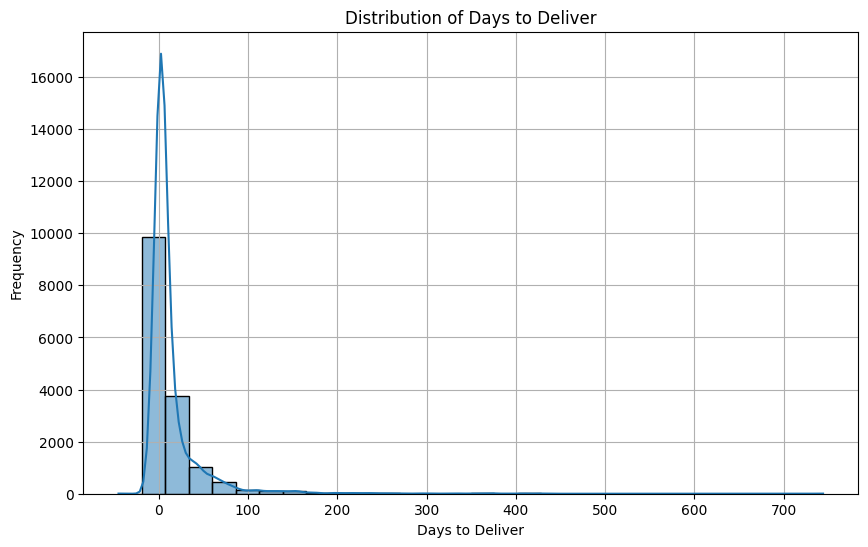

In [22]:
### adding some visualizations to help us understand the year, month, date related distributions

df_ml3_visual = pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_4.1ndbinen_impu_tr.csv")


#v 1: histogram for "Days_to_Deliver"
plt.figure(figsize=(10, 6))
sns.histplot(df_ml3_visual["Days_to_Deliver"], bins=30, kde=True)
plt.title("Distribution of Days to Deliver")
plt.xlabel("Days to Deliver")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_14359/2135583264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df_ml3_visual, palette="viridis")


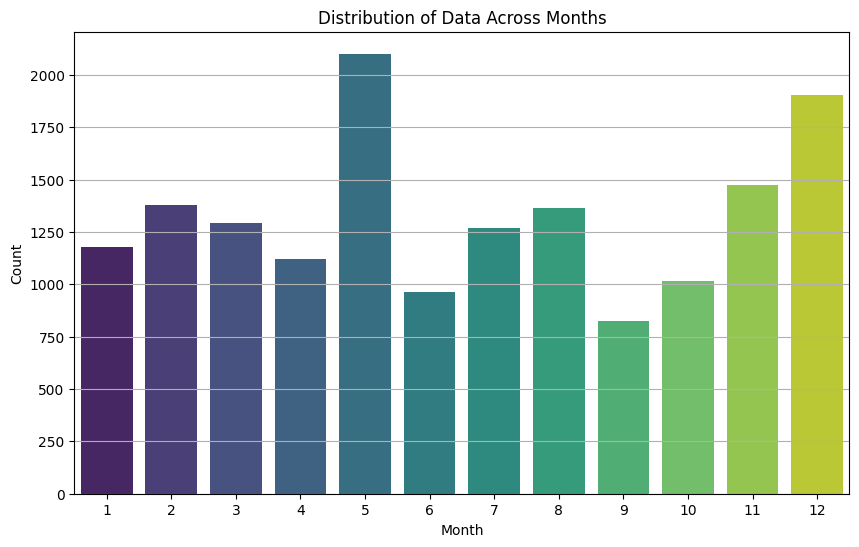

In [23]:
# v 2: bar chart for "Month"
plt.figure(figsize=(10, 6))
sns.countplot(x="Month", data=df_ml3_visual, palette="viridis")
plt.title("Distribution of Data Across Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()


/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_14359/2109131354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts.index, y=destination_counts.values, palette="viridis")


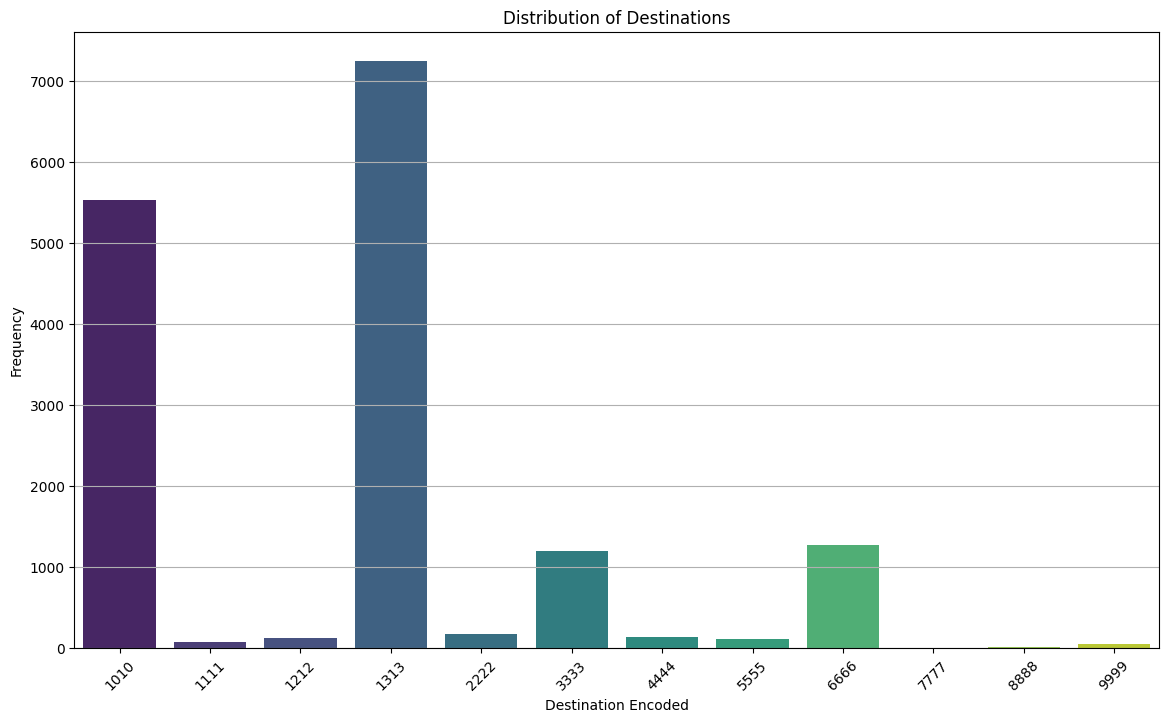

In [24]:
# v3: Value Counts for "Destination_encoded_imputed"
plt.figure(figsize=(14, 8))
destination_counts = df_ml3_visual["Destination_encoded_closest"].value_counts()
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette="viridis")
plt.title("Distribution of Destinations")
plt.xlabel("Destination Encoded")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


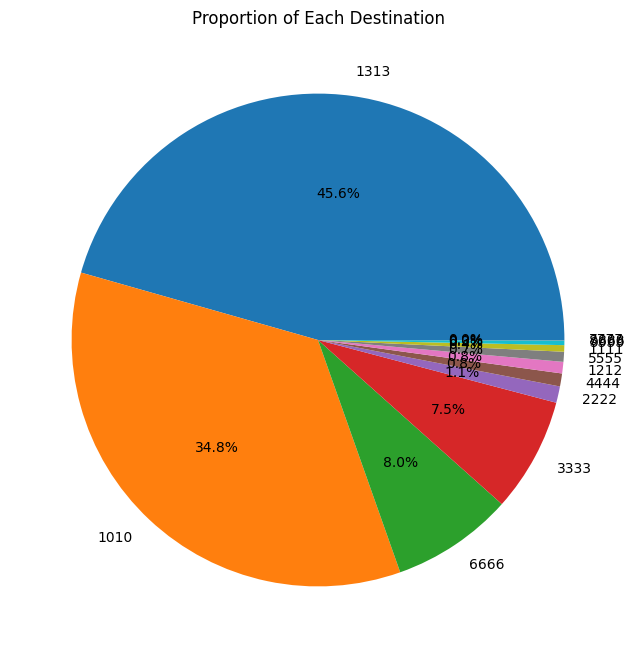

In [25]:
# v4: pie Chart "Destination_encoded_imputed"
plt.figure(figsize=(10, 8))
df_ml3_visual["Destination_encoded_closest"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Proportion of Each Destination")
plt.ylabel("")
plt.show()

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_14359/2793389137.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ABC_encoded", data=df_ml3, palette="viridis")


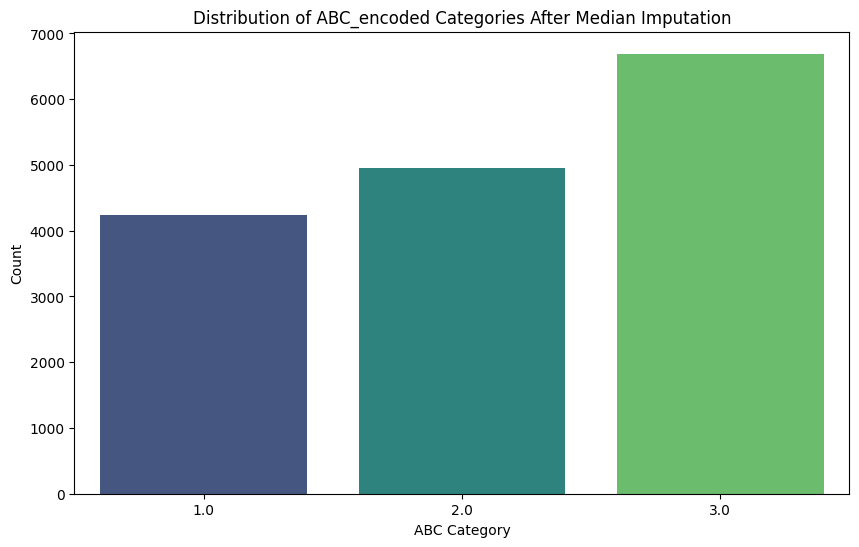

In [26]:
## there are 110 count of zero values in "ABC_encoded" column, I want to apply KNN Imputer to replace these 110 zero values. 
### we replce zeros in "ABC_encoded" column with NaN and apply SimpleImputer median

df_ml3["ABC_encoded"].replace(0, np.nan, inplace=True)

## Setting up the imputer
imputer=SimpleImputer(strategy="median")

## applying imputation to the 'ABC_encoded' column
df_ml3["ABC_encoded"]=imputer.fit_transform(df_ml3[["ABC_encoded"]])

## v5: distribution of ABC_encoded 
plt.figure(figsize=(10, 6))
sns.countplot(x="ABC_encoded", data=df_ml3, palette="viridis")
plt.title("Distribution of ABC_encoded Categories After Median Imputation")
plt.xlabel("ABC Category")
plt.ylabel("Count")
plt.show()

# export to CSV "ML_Data_4.2ndbinen_abcimpu_tr"
df_ml3.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/recommended/CA2 - Data Exploration amp Preparation - Instructions-20240402/ML_Data_4.2ndbinen_abcimpu_tr.csv", index=False)



In [27]:
df_ml3.isnull().sum()
### we identified "Qty Delivered" "Delivered Date_str" "Days_to_Deliver" "Qty Difference" columns all have 319 missing values
### this is likely those amount never got dispatched for some reason. And these 319 missing values could be incorrectly captured as dispatched and counted as a sales transactions.
### same 319 result as earlier, indicate our data is still accurate

ID_Record                        0
ID                               0
Entry ID                         0
Strategic Sale                   0
Group                            0
Sequence                         0
Product                          0
Qty                              0
Total Value                      0
Unit Price                       0
Qty Delivered                  319
Market Demand                    0
Week                             0
Strateg Prod                     0
Customer Group                   0
Planned Date_str                 0
Date_str                         0
Delivered Date_str             319
Year                             0
Month                            0
Day                              0
DayOfWeek                        0
Days_to_Deliver                319
Quarter_Year                     0
Quarter_Num                      0
Strat Customer Converted         0
TYPE Converted                   0
Replacement Converted            0
Calculated Unit Pric

    Product  TYPE Converted  ABC_encoded        mean  median  count
0      4440               4          3.0  234.074074    30.0     27
1      4440               8          2.0    2.000000     2.0      1
2      4440               8          3.0   59.655712    10.0    639
3      4450               4          3.0  368.235294    80.0     17
4      4450               8          3.0   24.181818     7.0    176
..      ...             ...          ...         ...     ...    ...
95     4493               4          2.0  133.559322    40.0     59
96     4493               8          2.0   16.989136     4.0   2117
97     4494               4          3.0   30.000000    30.0      1
98     4494               8          3.0    4.500000     3.5     18
99     4502               8          3.0    1.000000     1.0      1

[100 rows x 6 columns]


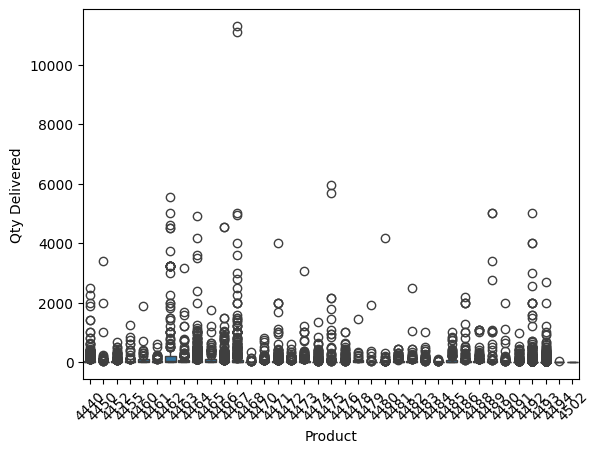

In [28]:
grouped_analysis=df_ml3.groupby(["Product", "TYPE Converted", "ABC_encoded"])["Qty Delivered"].agg(["mean", "median", "count"]).reset_index()
print(grouped_analysis)

## v7. x="Product", y="Qty Delivered"
sns.boxplot(data=df_ml3, x="Product", y="Qty Delivered")
plt.xticks(rotation=45)
plt.show()

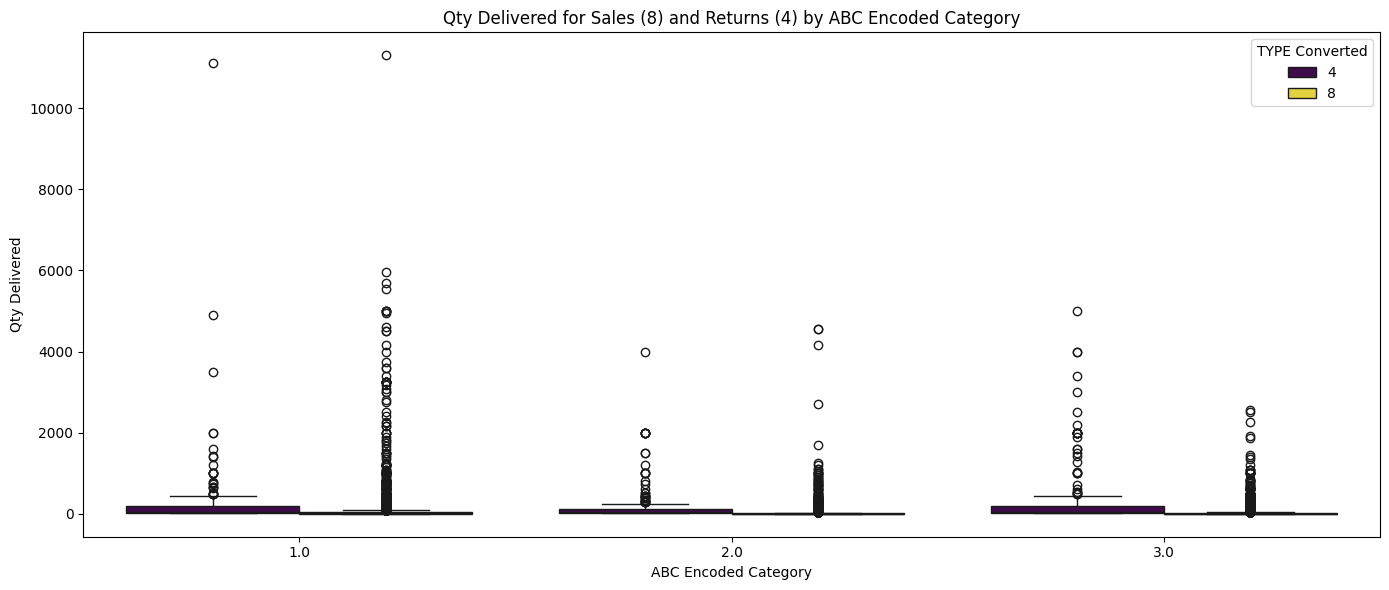

   TYPE Converted  ABC_encoded        mean  median  count   min      max
0               4          1.0  273.393665    50.0    221  10.0  11100.0
1               4          2.0  200.136364    50.0    220  10.0   4000.0
2               4          3.0  281.590106    50.0    283  10.0   5000.0
3               8          1.0  104.141555    10.0   3949   1.0  11300.0
4               8          2.0   29.935948     4.0   4590   1.0   4550.0
5               8          3.0   32.107483     6.0   6308   1.0   2559.0


In [29]:
# filter for "TYPE Converted" values of 8 (sales) and 4 (returns)
sales_returns_analysis=df_ml3[df_ml3["TYPE Converted"].isin([8, 4])]

# group by "TYPE Converted" and "ABC_encoded" to analyze "Qty Delivered"
grouped_analysis=sales_returns_analysis.groupby(["TYPE Converted", "ABC_encoded"])["Qty Delivered"]\
    .agg(["mean", "median", "count", "min", "max"]).reset_index()

# v8. distribution of "Qty Delivered" for sales and returns by ABC category
plt.figure(figsize=(14, 6))
sns.boxplot(x="ABC_encoded", y="Qty Delivered", hue="TYPE Converted", data=sales_returns_analysis, palette="viridis")
plt.title("Qty Delivered for Sales (8) and Returns (4) by ABC Encoded Category")
plt.xlabel("ABC Encoded Category")
plt.ylabel("Qty Delivered")
plt.legend(title="TYPE Converted")
plt.tight_layout()
plt.show()

print(grouped_analysis)

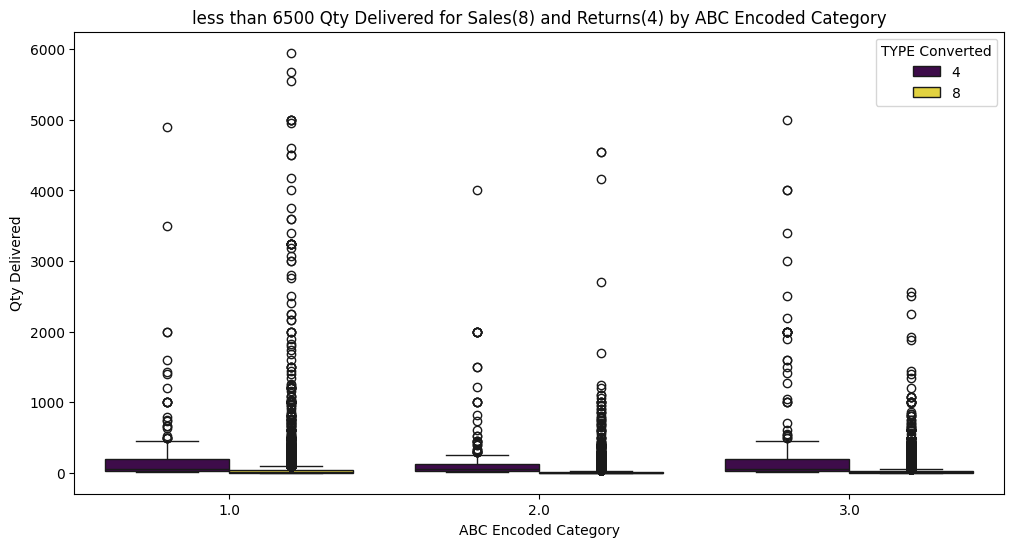

In [30]:
# filter out 'Qty Delivered' that are above 6500
df_zoomed=df_ml3[df_ml3["Qty Delivered"] <= 6500]

# v9. create the boxplot again with the "Qty Delivered" values are below 6500 
plt.figure(figsize=(12, 6))
sns.boxplot(x="ABC_encoded", y="Qty Delivered", hue="TYPE Converted", data=df_zoomed, palette="viridis")
plt.title("less than 6500 Qty Delivered for Sales(8) and Returns(4) by ABC Encoded Category")
plt.xlabel("ABC Encoded Category")
plt.ylabel("Qty Delivered")
plt.legend(title="TYPE Converted")
plt.show()